# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [6]:
raw_data = pd.read_csv('Bank_data.csv')
data = raw_data.copy()
data['y'] = data['y'].map({'yes' : 1,'no' : 0})
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
5,5,0.899,0.0,0.0,1.0,0.0,126.0,0
6,6,4.962,0.0,0.0,0.0,0.0,84.0,0
7,7,4.858,0.0,1.0,0.0,0.0,17.0,0
8,8,4.962,0.0,0.0,0.0,0.0,704.0,1
9,9,4.865,0.0,0.0,0.0,0.0,185.0,0


In [7]:
data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [10]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [11]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                  0.2121
Time:                        18:39:15   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

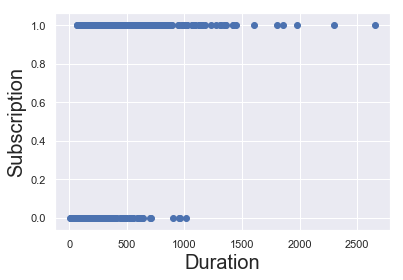

In [13]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Subscription',fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [80]:
estimators = ['interest_rate','credit','march','may','previous','duration']
x1_all = data[estimators]
y = data['y']

In [81]:
x_all = sm.add_constant(x1_all)
reg_logit = sm.Logit(y,x_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.515     
Dependent Variable: y                AIC:              362.0356  
Date:               2019-03-28 19:24 BIC:              391.7855  
No. Observations:   518              Log-Likelihood:   -174.02   
Df Model:           6                LL-Null:          -359.05   
Df Residuals:       511              LLR p-value:      7.5788e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.1385   0.3395 -0.4080 0.6833 -0.8039  0.5269
interest_rate     -0.7802   0.0921 -8.4712 0.0000 -0.9607 -0.5997
credit             2.4028   1.0895  2.2053 0.0274  0.2673  4.5382
march             -1.8097   0.3315 -5.4585 0.0000 -2.4594 -1.1599
may                0.1946   0.2293  0.8488 0.3960 -0.2548  0.6440
previous           1.2746   0.5831  2.1861 0.0288  0.1319  2.4174
duration           0.0070   0.0007  9.3864 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [82]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [83]:
confusion_matrix(x_all,y,results_logit)

(array([[220.,  39.],
        [ 31., 228.]]), 0.8648648648648649)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [84]:
test = pd.read_csv('Bank-data-testing.csv')
test

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
5,5,0.697,0.0,1.0,4.0,0.0,131.0,no
6,6,0.639,1.0,0.0,0.0,0.0,215.0,yes
7,7,4.120,0.0,0.0,0.0,0.0,499.0,no
8,8,1.281,0.0,1.0,1.0,0.0,809.0,yes
9,9,4.966,0.0,0.0,0.0,0.0,389.0,no


In [85]:
data_test = test.copy()
data_test = data_test.drop(['Unnamed: 0'],axis = 1)
data_test['y'] = data_test['y'].map({'yes' : 1,'no' : 0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
5,0.697,0.0,1.0,4.0,0.0,131.0,0
6,0.639,1.0,0.0,0.0,0.0,215.0,1
7,4.120,0.0,0.0,0.0,0.0,499.0,0
8,1.281,0.0,1.0,1.0,0.0,809.0,1
9,4.966,0.0,0.0,0.0,0.0,389.0,0


### Declare the dependent and the independent variables

In [86]:
y_test = data_test['y']
x1_test = data_test[estimators]
x_test = sm.add_constant(x1_test)
x1_test

,interest_rate,credit,march,may,previous,duration
0,1.313,0.0,1.0,0.0,0.0,487.0
1,4.961,0.0,0.0,0.0,0.0,132.0
2,4.856,0.0,1.0,0.0,0.0,92.0
3,4.120,0.0,0.0,0.0,0.0,1468.0
4,4.963,0.0,0.0,0.0,0.0,36.0
5,0.697,0.0,1.0,4.0,0.0,131.0
6,0.639,1.0,0.0,0.0,0.0,215.0
7,4.120,0.0,0.0,0.0,0.0,499.0
8,1.281,0.0,1.0,1.0,0.0,809.0
9,4.966,0.0,0.0,0.0,0.0,389.0


### test result

In [87]:
confusion_matrix(x_test,y_test,results_logit)

(array([[94., 17.],
        [12., 99.]]), 0.8693693693693694)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

### train result

In [88]:
confusion_matrix(x_all,y,results_logit)

(array([[220.,  39.],
        [ 31., 228.]]), 0.8648648648648649)